In [1]:
import sys
sys.path.append('/home/hrai/codes/hpe_library')
from lib_import import *
from my_utils import *
os.chdir('/home/hrai/codes/MotionBERT')

import os
import numpy as np
import random
import torch

from lib.utils.learning import * # load_backbone
from lib.utils.args import get_opts_args
from lib.utils.utils_data import flip_data
from lib.model.load_dataset import load_dataset
from lib.model.load_model import load_model
from lib.model.loss import *
from lib.model.training import *
from lib.model.evaluation import *

os.environ["NCCL_P2P_DISABLE"]= '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '0, 1'

def set_random_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

class train_canonical_module():
    def __init__(self):
        try:
            # load data -----------------------------------------------------
            self.load_h36m()     
            #self.init_plot()       
        except Exception as e:
            print(e)
                
    def load_h36m(self):
        print('load_h36m')
        self.h36m_3d_world, self.h36m_cam_param = load_h36m()
        self.subject_list = natsorted(list(self.h36m_3d_world._data.keys()))
        self.subject = 'S1'
        self.action_list = natsorted(list(self.h36m_3d_world._data[self.subject_list[0]].keys()))
        self.pose_3d_list, self.cam_param = get_pose_seq_and_cam_param(self.h36m_3d_world, self.h36m_cam_param, self.subject, self.action_list[0])
        
        self.init_camera()
        
    def init_camera(self):
        self.cameras = {}
        # camera parameter
        for cam_name in self.cam_param.keys():
            W, H = self.cam_param[cam_name]['W'], self.cam_param[cam_name]['H']
            calib_mat = self.cam_param[cam_name]['int']['calibration_matrix']
            R = np.array(self.cam_param[cam_name]['ext']['R'])
            t = np.array(self.cam_param[cam_name]['ext']['t'])/1000
            C = T_to_C(R, t)

            camera = Camera(origin=C, 
                            calib_mat=calib_mat, 
                            cam_default_R=R, 
                            IMAGE_HEIGHT=H, 
                            IMAGE_WIDTH=W)
            
            self.cameras[cam_name] = camera
            
    #def init_plot(self):
        
tcm = train_canonical_module()

load_h36m
==> Loading 3D data wrt World CS...


In [5]:
tcm.cam_param.keys()

dict_keys(['54138969', '55011271', '58860488', '60457274'])

In [30]:
action_list = natsorted(list(tcm.h36m_3d_world._data['S1'].keys()))
action_list

['Directions',
 'Directions 1',
 'Discussion',
 'Discussion 1',
 'Eating',
 'Eating 2',
 'Greeting',
 'Greeting 1',
 'Phoning',
 'Phoning 1',
 'Photo',
 'Photo 1',
 'Posing',
 'Posing 1',
 'Purchases',
 'Purchases 1',
 'Sitting 1',
 'Sitting 2',
 'SittingDown',
 'SittingDown 2',
 'Smoking',
 'Smoking 1',
 'Waiting',
 'Waiting 1',
 'WalkDog',
 'WalkDog 1',
 'WalkTogether',
 'WalkTogether 1',
 'Walking',
 'Walking 1']

In [31]:
pose_3d_list, cam_param = get_pose_seq_and_cam_param(tcm.h36m_3d_world, tcm.h36m_cam_param, 'S1', 'Walking')

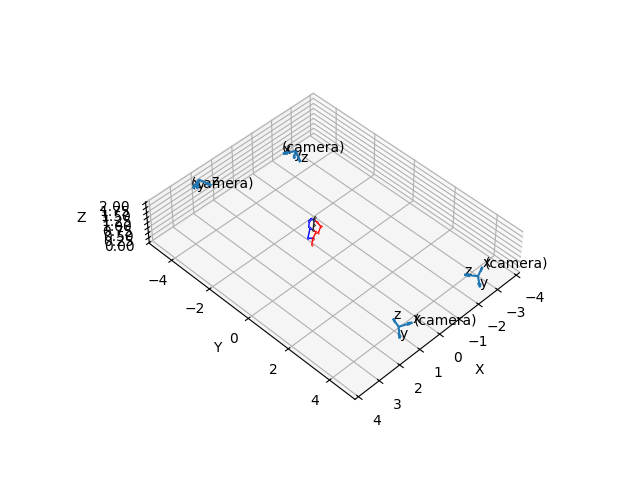

In [32]:
%matplotlib widget
fig = plt.figure()
fig.clear()
ax = axes_3d(fig, xlim=(-4, 4), ylim=(-5, 5), zlim=(0, 2), view=(45, 45))


plt.sca(ax)
for cam_name in tcm.cameras.keys():
    tcm.cameras[cam_name].cam_frame.draw3d()
    
frame_num = 500
pose_3d = pose_3d_list[frame_num]
draw_3d_pose(ax, pose_3d)
    
plt.show()